#AI PROJECT
The Code is run from top to bottom. Follow the text that is above each part of the notebook.
*Make sure to change the file path according to where the file is located. This file is originally in /content/drive/MyDrive/ColabNotebooks/Group4_AI_Project/Info.csv (Colab Notebooks has a space in it in the path

##1. Importing CSV Data

**Run** this portion first. It reads the csv file of the data and prints it

In [ ]:
#importing libraries
import numpy as np
import torch
from gettext import npgettext
from glob import glob
import pandas as panda
import csv
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#reads text file into pandas DataFrame and makes a header
data = panda.read_csv('/content/drive/MyDrive/Colab Notebooks/Group4_AI_Project/Info.csv')

#displays DataFrame
print(data)


     REFNUM TISSUE TYPE  CLASS SEVERITY      X      Y  RADIUS
0    mdb001          G   CIRC        B   535.0  425.0   197.0
1    mdb002          G   CIRC        B   522.0  280.0    69.0
2    mdb003          D   NORM       NaN    NaN    NaN     NaN
3    mdb004          D   NORM       NaN    NaN    NaN     NaN
4    mdb005          F   CIRC        B   500.0  168.0    26.0
..      ...         ...    ...      ...    ...    ...     ...
317  mdb318          D   NORM       NaN    NaN    NaN     NaN
318  mdb319          D   NORM       NaN    NaN    NaN     NaN
319  mdb320          D   NORM       NaN    NaN    NaN     NaN
320  mdb321          D   NORM       NaN    NaN    NaN     NaN
321  mdb322          D   NORM       NaN    NaN    NaN     NaN

[322 rows x 7 columns]


##2. Printing Class Diagram
**Run second to ger the countplot for the different classifications of data**

<Axes: xlabel='CLASS', ylabel='count'>

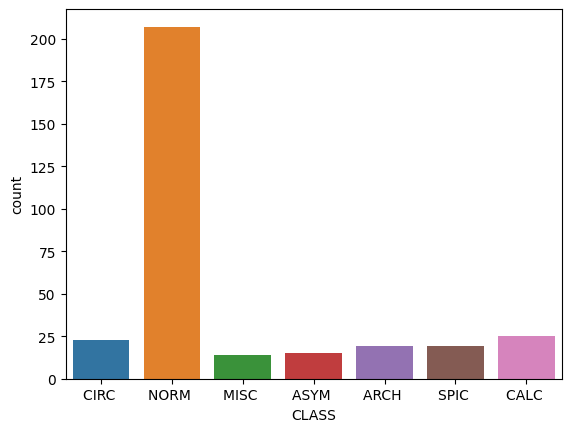

In [ ]:
#SHows the number of scans based on classification types from the scans
#CALC: calcification, CIRC: well-defined/circumscribed masses, SPIC: spiculated masses,
#MISC: Other, ill-defined masses, ARCH: architectural distortion , ASYM: asymmetry, NORM: normall
sns.countplot(x="CLASS", data=data)

##3. ENCODING CLASS DATA
**encodes the CLASS data from the dataset

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", data['CLASS'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = data["CLASS"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from CLASS column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encoding data
Y_class = labelencoder.fit_transform(y) #classification data is converted to integers
print("Labels after encoding are: ", np.unique(y))
print(Y_class)

Distribution of data:  NORM     207
CALC      25
CIRC      23
ARCH      19
SPIC      19
ASYM      15
MISC      14
Name: CLASS, dtype: int64
Labels before encoding are:  ['ARCH ' 'ASYM ' 'CALC ' 'CIRC ' 'MISC ' 'NORM ' 'SPIC ']
Labels after encoding are:  ['ARCH ' 'ASYM ' 'CALC ' 'CIRC ' 'MISC ' 'NORM ' 'SPIC ']
[3 3 5 5 3 5 5 5 5 3 5 3 4 5 3 5 3 5 3 5 3 5 3 5 3 5 5 3 5 4 5 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 3 5 5 5 4 5 5 5 5 5 3 5 5 1 5 5
 1 5 5 5 5 3 1 5 1 5 5 5 5 5 5 1 3 1 5 5 1 5 1 5 1 5 5 1 5 1 1 5 1 5 5 1 1
 5 5 5 0 5 0 5 5 0 0 5 5 0 0 0 0 5 5 0 5 3 5 4 5 5 5 5 5 5 3 3 5 4 6 5 5 6
 5 0 5 0 5 5 0 5 5 0 5 0 5 5 0 5 0 5 0 5 5 0 0 5 5 5 6 5 5 6 6 5 6 5 5 6 5
 6 5 6 5 6 6 5 6 5 6 5 5 6 6 5 5 6 5 6 5 6 6 5 2 5 2 2 2 2 5 2 5 2 2 5 5 2
 2 5 5 2 2 5 5 5 2 5 2 5 5 2 5 2 2 2 2 5 5 3 2 5 5 2 2 5 5 2 2 5 5 2 5 5 5
 5 5 5 5 4 4 5 4 5 5 3 4 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 4 3 5 5 5 5 5 5 5]


#4. Encoding the Refnum labels

In [ ]:
y = data["REFNUM"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from REFNUM column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) #classification data is converted to integers
print("Labels after encoding are: ", np.unique(Y))

Labels before encoding are:  ['mdb001' 'mdb002' 'mdb003' 'mdb004' 'mdb005' 'mdb006' 'mdb007' 'mdb008'
 'mdb009' 'mdb010' 'mdb011' 'mdb012' 'mdb013' 'mdb014' 'mdb015' 'mdb016'
 'mdb017' 'mdb018' 'mdb019' 'mdb020' 'mdb021' 'mdb022' 'mdb023' 'mdb024'
 'mdb025' 'mdb026' 'mdb027' 'mdb028' 'mdb029' 'mdb030' 'mdb031' 'mdb032'
 'mdb033' 'mdb034' 'mdb035' 'mdb036' 'mdb037' 'mdb038' 'mdb039' 'mdb040'
 'mdb041' 'mdb042' 'mdb043' 'mdb044' 'mdb045' 'mdb046' 'mdb047' 'mdb048'
 'mdb049' 'mdb050' 'mdb051' 'mdb052' 'mdb053' 'mdb054' 'mdb055' 'mdb056'
 'mdb057' 'mdb058' 'mdb059' 'mdb060' 'mdb061' 'mdb062' 'mdb063' 'mdb064'
 'mdb065' 'mdb066' 'mdb067' 'mdb068' 'mdb069' 'mdb070' 'mdb071' 'mdb072'
 'mdb073' 'mdb074' 'mdb075' 'mdb076' 'mdb077' 'mdb078' 'mdb079' 'mdb080'
 'mdb081' 'mdb082' 'mdb083' 'mdb084' 'mdb085' 'mdb086' 'mdb087' 'mdb088'
 'mdb089' 'mdb090' 'mdb091' 'mdb092' 'mdb093' 'mdb094' 'mdb095' 'mdb096'
 'mdb097' 'mdb098' 'mdb099' 'mdb100' 'mdb101' 'mdb102' 'mdb103' 'mdb104'
 'mdb105' 'mdb106' 'md

#5. Encoding the Tissue Type Data

In [ ]:
y = data["TISSUE TYPE"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from CLASS column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) #classification data is converted to integers
print("Labels after encoding are: ", np.unique(Y))

Labels before encoding are:  ['D ' 'F ' 'G ']
Labels after encoding are:  [0 1 2]


#6. Encoding the Severity Data

In [ ]:
y = data["SEVERITY"].values
#data.dropna(subset=['SEVERITY'], inplace=True)
print(y)
data['SEVERITY'].replace( np.nan, 'n', inplace=True)
print(y)



print("Labels before encoding are: ", np.unique(y))

#data['SEVERITY'] = data['SEVERITY'].astype(float)
# Encoding categorical data from CLASS column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y_severity = labelencoder.fit_transform(y) #classification data is converted to integers
print("Labels after encoding are: ", np.unique(Y))

['B ' 'B ' nan nan 'B ' nan nan nan nan 'B ' nan 'B ' 'B ' nan 'B ' nan
 'B ' nan 'B ' nan 'B ' nan 'M ' nan 'B ' nan nan 'M ' nan 'B ' nan 'B '
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan 'M ' 'B' nan nan nan 'B ' nan nan nan nan nan
 'B ' nan nan 'M ' nan nan 'M ' nan nan nan nan 'B ' 'B ' nan 'B ' nan nan
 nan nan nan nan 'M ' 'B ' 'M ' nan nan 'M ' nan 'B ' nan 'B ' nan nan
 'M ' nan 'B ' 'M ' nan 'B ' nan nan 'M ' 'M ' nan nan nan 'M ' nan 'M '
 nan nan 'M ' 'B ' nan nan 'M ' 'M ' 'B ' 'B ' nan nan 'M ' nan 'B ' nan
 'M ' nan nan nan nan nan nan 'M ' 'B ' nan 'B ' 'B ' nan nan 'M ' nan
 'B ' nan 'B ' nan nan 'M ' nan nan 'M ' nan 'B ' nan nan 'B ' nan 'B '
 nan 'B ' nan nan 'M ' 'M ' nan nan nan 'B ' nan nan 'M ' 'M ' nan 'M '
 nan nan 'M ' nan 'M ' nan 'B ' nan 'B ' 'B ' nan 'B ' nan 'B ' nan nan
 'B ' 'B ' nan nan 'M ' nan 'B ' nan 'M ' 'B ' nan 'M ' nan 'M ' 'B ' 'M '
 'B ' nan 'M ' nan 'B ' 'B ' nan nan 'B ' 'B ' nan na

#7. Print Describe label, Radius

In [ ]:
#Define the independent variables. Drop label and ID, and normalize other data
X = data.drop(labels = ["REFNUM", "TISSUE TYPE"], axis=1)
print(X.describe().T) #Needs scaling

        count        mean         std    min    25%    50%    75%    max
X       111.0  491.819820  133.455079  127.0  401.5  510.0  572.5  793.0
Y       111.0  517.792793  177.968645  125.0  426.0  517.0  620.5  994.0
RADIUS  111.0   50.414414   33.894346    3.0   28.0   43.0   62.0  197.0


#8. Prints the encoded SEVERITY column

In [ ]:
X['SEVERITY'] = Y_severity
print(X)

     CLASS  SEVERITY      X      Y  RADIUS
0    CIRC          1  535.0  425.0   197.0
1    CIRC          1  522.0  280.0    69.0
2    NORM          3    NaN    NaN     NaN
3    NORM          3    NaN    NaN     NaN
4    CIRC          1  500.0  168.0    26.0
..     ...       ...    ...    ...     ...
317  NORM          3    NaN    NaN     NaN
318  NORM          3    NaN    NaN     NaN
319  NORM          3    NaN    NaN     NaN
320  NORM          3    NaN    NaN     NaN
321  NORM          3    NaN    NaN     NaN

[322 rows x 5 columns]


#9. Prints the encoded CLASS values

In [ ]:
X['CLASS']=Y_class
print(X)


     CLASS  SEVERITY      X      Y  RADIUS
0        3         1  535.0  425.0   197.0
1        3         1  522.0  280.0    69.0
2        5         3    NaN    NaN     NaN
3        5         3    NaN    NaN     NaN
4        3         1  500.0  168.0    26.0
..     ...       ...    ...    ...     ...
317      5         3    NaN    NaN     NaN
318      5         3    NaN    NaN     NaN
319      5         3    NaN    NaN     NaN
320      5         3    NaN    NaN     NaN
321      5         3    NaN    NaN     NaN

[322 rows x 5 columns]


#10 Checks to see if data is null

In [ ]:
print(data.isnull().sum())

REFNUM           0
TISSUE TYPE      0
CLASS            0
SEVERITY         0
X              211
Y              211
RADIUS         211
dtype: int64


:#11. Scaling data for training/testing (Run two times to get the scaled data)

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
print(X)  #Scaled values
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)


[[0.5        0.33333333 0.61261261 0.3452244  1.        ]
 [0.5        0.33333333 0.59309309 0.17836594 0.34020619]
 [0.83333333 1.                nan        nan        nan]
 ...
 [0.83333333 1.                nan        nan        nan]
 [0.83333333 1.                nan        nan        nan]
 [0.83333333 1.                nan        nan        nan]]


#12. Spliting the Data


In [ ]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (241, 5)
Shape of testing data is:  (81, 5)


#13. getting the shape values of data

In [ ]:
from torch.utils.data.dataset import TensorDataset
#getting data shape and assigning testing and training data
data.shape


#starting and ending of data points
training_data = data[0:300]
testing_data= data[300:]

#number of testing and training data shapes
print(f"Testing Data: ", testing_data.shape) #Testing ther accurtacy of the model
print(f"Trainng Data ", training_data.shape) #data to create the model


Testing Data:  (22, 7)
Trainng Data  (300, 7)


#14. Importing test data with Torch

In [ ]:
import torch
Y_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(np.asarray(Y_test))

#15. Creating the Sequential Model (RUN THIS BEFORE THE MIASClassifier MODEL!!)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(7, 12),
    nn.ReLU(),
    nn.Linear(12,7),
    nn.ReLU(),
    nn.Linear(7, 1),
    nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=7, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=1, bias=True)
  (5): Sigmoid()
)


#16. Check The torch version

In [ ]:
print(torch.__version__)

2.0.0+cu118


#17. Running the MIASClassifier Model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

class MIASClassifier(nn.Module):
    def __init__(self, device,n_inputs, lr =.01):
        super(model,self).__init__()
        self.hidden1 = nn.Linear(7, 12)
        self.device = device
        self.n_inputs = n_inputs
        self.lr = lr
        self.dense1 = nn.Linear(in_features=n_inputs, out_features=64).cuda(device=self.device)
        self.dense2 = nn.Linear(in_features=64, out_features=32).cuda(device=self.device)
        self.out = nn.Linear(in_features=32, out_features=1).cuda(device=self.device)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 7)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(7, 1)
        self.act_output = nn.Sigmoid()
    def __call__(t):
       return self.forward(t)

    def forward(self,t):
        # (1) input layer
        t = t

        # (2) hidden dense layer
        t = self.dense1(t)
        t = F.relu(t)

        # (3) hidden dense layer
        t = self.dense2(t)
        t = F.relu(t)

        # (4) output_layer
        t = self.out(t)
        t = torch.sigmoid(t)

        return t
        model = MIASClassifier()
    def __len__(self):
      return self.len

loader=DataLoader(dataset=data,batch_size=64)
#printing model
print(model)
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")



Sequential(
  (0): Linear(in_features=7, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=1, bias=True)
  (5): Sigmoid()
)
Layer: 0.weight | Size: torch.Size([12, 7]) | Values : tensor([[ 0.1437, -0.0177, -0.2519, -0.2692, -0.1328, -0.3361,  0.2160],
        [ 0.2470, -0.0797, -0.1099,  0.2769,  0.1235,  0.2944, -0.2404]],
       grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([12]) | Values : tensor([-0.1763, -0.0896], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([7, 12]) | Values : tensor([[ 0.0126, -0.2366,  0.0855,  0.2124,  0.1292,  0.2653,  0.2403, -0.1799,
          0.2161,  0.1450, -0.1619, -0.0166],
        [-0.1435,  0.2572,  0.0038, -0.1798,  0.2287, -0.0505, -0.2255,  0.0399,
         -0.2766,  0.1682,  0.1133,  0.0189]], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([7]) | Values : tensor([ 0.1548, -0.2313], grad_fn=<SliceB

In [ ]:
#import torch.optim as optim
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

#batch_size= 32
#n_inputs = len(X_train)
#n_batch = n_samples/batch_size

## x_train = X_train[i*batch_size, (i+1)*batch_size]

#18. Training the Proposed method (MIASClassification data) (This will cause errors for the Keras if this is run before it. Uncomment after you get the results from the keras model)

In [ ]:
from torchvision.transforms.transforms import ToTensor
import torch
from torch import nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

#checking GPU
is_gpu = torch.cuda.is_available()

# Split data into train and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # make the random split reproducible

#Lengths of testing and training
len(X_train), len(X_test), len(y_train), len(y_test)



transforms = transforms.Compose([transforms.ToTensor()])

#Loading testing and training data
trainloader = DataLoader(X_train, batch_size= 32, shuffle=True)
testloader = DataLoader(y_test, batch_size= 32, shuffle=True)

#optimizer and loss types
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

epochs = 100

for i in range(epochs):
  train_loss = 0.1
  for data in trainloader:
        if is_gpu:
            data, label = data.cuda(), label.cuda()
        optimizer.zero_grad()

        #output = model (data)
        #loss = criterion(optimizer)
        #loss.backward()

        #optimizer.step()

        #train_loss += loss.item() * data.size(0)
print(f'Epoch: {i+1} / {epochs} \t\t\t Training Loss:{train_loss/len(trainloader)}')

Epoch: 100 / 100 			 Training Loss:0.0125


KERAS Benchmark

#19. Running the Keras Model and print the model summary

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.backend as K

model = Sequential()
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.add(Dense(260, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorial_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
print('Learning rate: ',K.eval(model.optimizer.learning_rate))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 260)               1560      
                                                                 
 dropout_1 (Dropout)         (None, 260)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 261       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,821
Trainable params: 1,821
Non-trainable params: 0
_________________________________________________________________
None
Learning rate:  0.001


#20. Compiling the Keras Model

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#21. Fitting the model and training/testing the data

In [ ]:
model.fit(X_train,y_train, verbose =1,epochs=100,batch_size=32,validation_data=(X_test,y_test))


Epoch 1/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.3610 - val_loss: nan - val_accuracy: 0.3086
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: nan - acc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


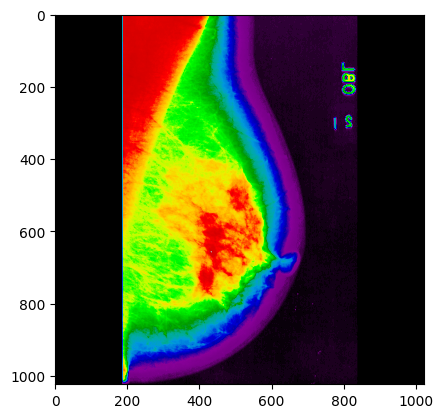

In [ ]:
import PIL
import matplotlib.pyplot as plt
from PIL import Image

img = np.asarray(Image.open('/content/drive/MyDrive/Colab Notebooks/Group4_AI_Project/Preprocessing Pics/mdb120.pgm'))
print(repr(img))

#Changing colormap to see if we can find any abnormalioties based on enhancing the image
imgplot=plt.imshow(img)
imgplot.set_cmap('nipy_spectral')
